# Name - Gajemra Chandu Harnawle

# Data Science Intern @ LetsGrowMore

# Task 2: Prediction using Decision Tree Algorithm

# Importing the required libraries!!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Loading the Dataset

In [2]:
df = pd.read_csv('Iris (1).csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [7]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data Visualisation

In [10]:
species_count = df['Species'].value_counts()
labels = species_count.index.tolist()
count = species_count.values.tolist()
species_count.to_frame()

,Species
Iris-virginica,50
Iris-setosa,50
Iris-versicolor,50


# Pie Chart

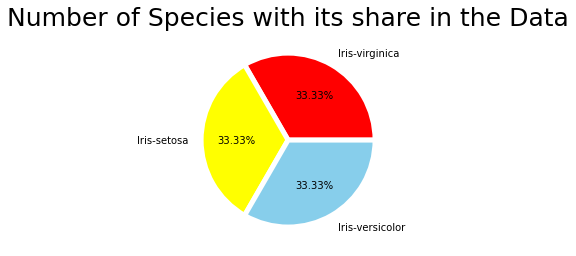

In [11]:
c1 = ['red', 'yellow', 'skyblue']
plt.pie(count, labels = labels, labeldistance = 1.15, wedgeprops = {'linewidth' : 5, 'edgecolor' : 'white'}, autopct = '%2.2f%%', colors = c1)
plt.title("Number of Species with its share in the Data", fontsize = 25)
plt.show()

# Histogram

In [13]:
df.drop(['Id'], axis=1,inplace=True)

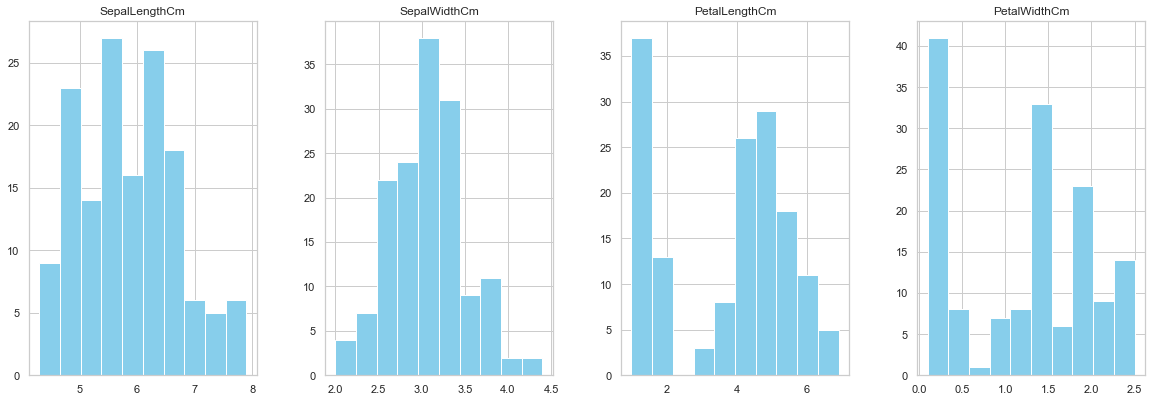

In [16]:
df.hist(figsize = (20,15), layout=(2,4), color="skyblue");

# Box plot

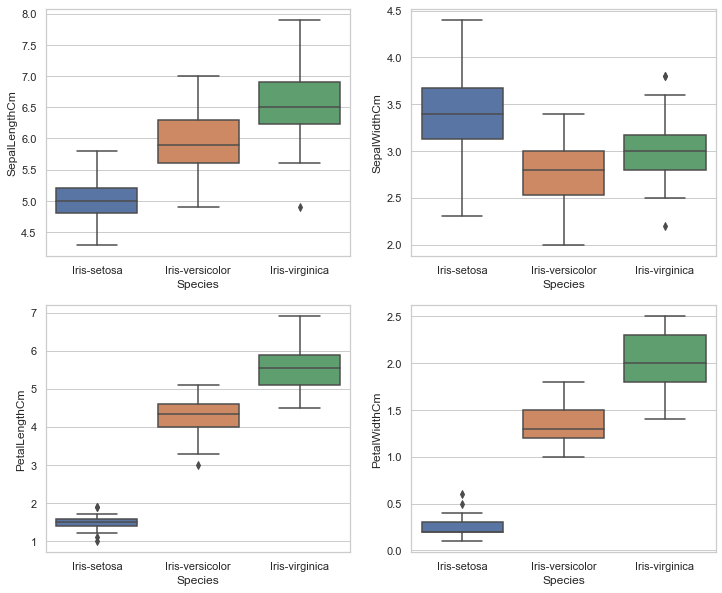

In [15]:
sns.set(style = "whitegrid")
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='SepalLengthCm', data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='SepalWidthCm', data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='PetalLengthCm', data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='PetalWidthCm', data=df)
plt.show()

# Pair plot

<Figure size 1080x432 with 0 Axes>

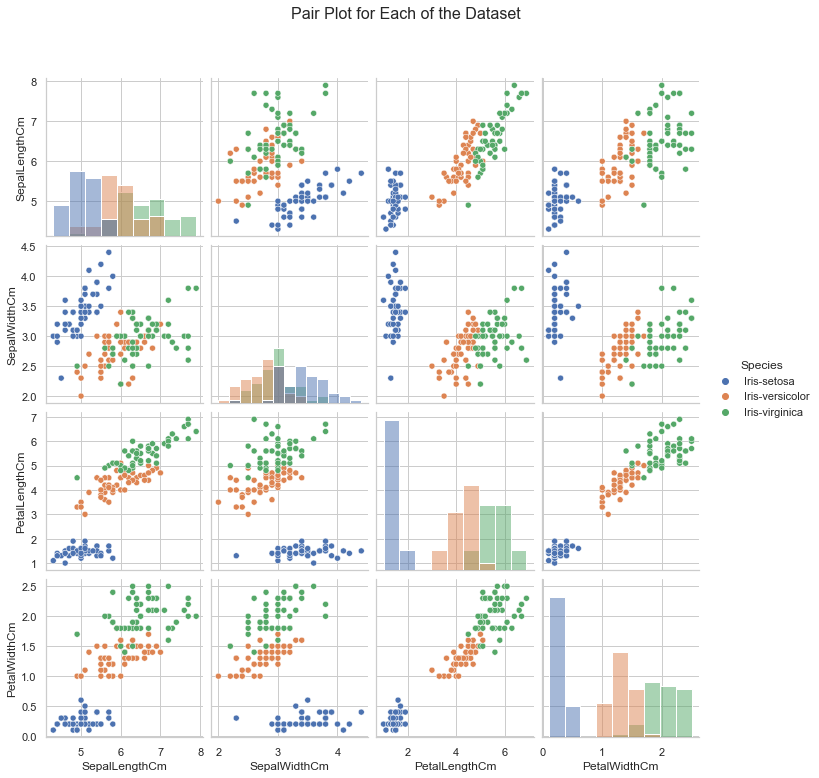

In [17]:
fig = plt.figure(figsize = (15,6))
visual = sns.pairplot(df, hue = 'Species', diag_kind = 'hist')
visual.fig.suptitle("Pair Plot for Each of the Dataset",y = 1.08, fontsize = 16)
plt.show()

# Heat Map

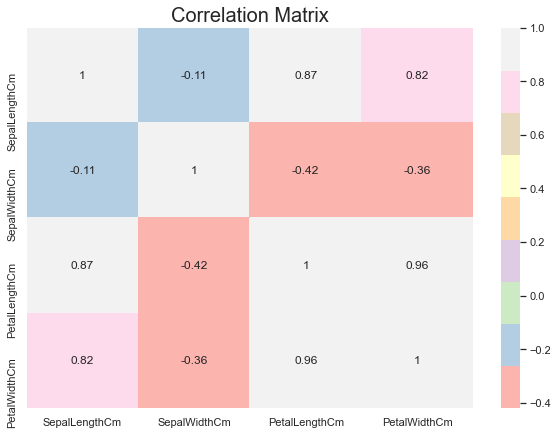

In [18]:
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True, cmap = 'Pastel1')
plt.title('Correlation Matrix',fontsize=20)
plt.show()

# Data preprocessing

In [43]:
X= df.iloc[:, 0:4]
X = X.values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [45]:
Y= df.iloc[:, 4]
Y = Y.values
Y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

# Splitting the Data into Train and Test set

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1)

# Predictions

In [47]:
clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [48]:
y_pred = clf.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Confusion Matrix

In [50]:
iris_cm = confusion_matrix(y_test, y_pred)
species = df['Species'].unique().tolist()
iris_cm = pd.DataFrame(iris_cm, index = species, columns = species)
iris_cm

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,11,0,0
Iris-versicolor,0,12,1
Iris-virginica,0,0,6


# Evaluation

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [52]:
acc_score = accuracy_score(y_test, y_pred)
print("The accuracy of the Decision Tree algorithm is: ",str(acc_score*100)+ "%")

The accuracy of the Decision Tree algorithm is:  96.66666666666667%


# Visualizing Decision Tree

In [53]:
from sklearn.tree import plot_tree

In [55]:
columns = df.columns.tolist()
print(columns)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


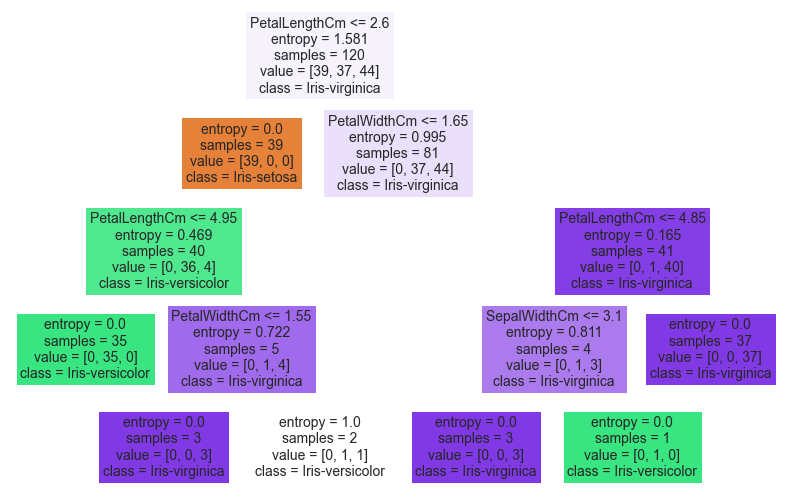

In [56]:
fig = plt.figure(figsize=(14,9))
tree_visual = plot_tree(clf, feature_names = columns, class_names = species, filled = True)